In [48]:
import librosa #https://librosa.org/
import librosa.display
import librosa.beat
import sounddevice as sd  #https://anaconda.org/conda-forge/python-sounddevice
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
fName = "Queries/MT0000202045.mp3"
sr = 22050
mono = True
warnings.filterwarnings("ignore")


In [3]:
y, fs = librosa.load(fName, sr=sr, mono = mono)
print(y.shape)
print(fs)

(662823,)
22050


In [ ]:
sd.play(y, sr, blocking=False)

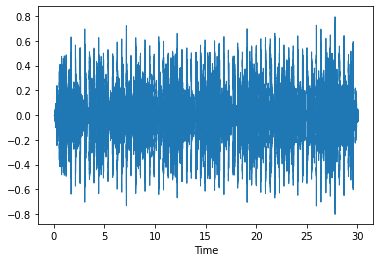

In [5]:
plt.figure()
librosa.display.waveshow(y)

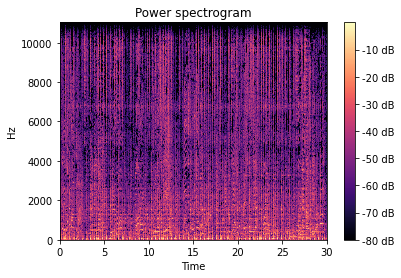

In [17]:
Y = np.abs(librosa.stft(y))
Ydb = librosa.amplitude_to_db(Y, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(Ydb, y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

(1295,)


Text(0.5, 1.0, 'RMS')

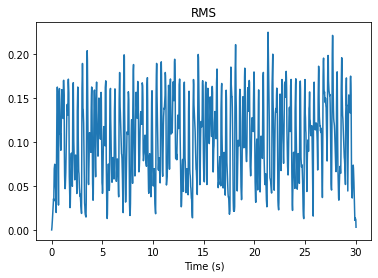

In [8]:
rms = librosa.feature.rms(y = y)
rms = rms[0, :]
print(rms.shape)
times = librosa.times_like(rms)
plt.figure(), plt.plot(times, rms)
plt.xlabel('Time (s)')
plt.title('RMS')

# Semana 2

In [36]:
features = pd.read_csv("dataset/Features - Audio MER/features.csv", delimiter=';')
features

,Feature,Name,Toolbox,Category,Family,Parent,Description
0,F0001,Root-Mean-Square Energy (mean),MIR Toolbox 1.6.1,Dynamics,Root-Mean-Square Energy,Root-Mean-Square Energy,The root mean square energy calculates the glo...
1,F0002,Root-Mean-Square Energy (std),MIR Toolbox 1.6.1,Dynamics,Root-Mean-Square Energy,Root-Mean-Square Energy,The root mean square energy calculates the glo...
2,F0003,Root-Mean-Square Energy (skewness),MIR Toolbox 1.6.1,Dynamics,Root-Mean-Square Energy,Root-Mean-Square Energy,The root mean square energy calculates the glo...
3,F0004,Root-Mean-Square Energy (kurtosis),MIR Toolbox 1.6.1,Dynamics,Root-Mean-Square Energy,Root-Mean-Square Energy,The root mean square energy calculates the glo...
4,F0005,Root-Mean-Square Energy (max),MIR Toolbox 1.6.1,Dynamics,Root-Mean-Square Energy,Root-Mean-Square Energy,The root mean square energy calculates the glo...
...,...,...,...,...,...,...,...
1598,F1599,1/12-Oct Spectrum IEC (FFT) - 1/12-Oct Spectru...,PsySound 3,Tone Color,1/12-Oct Spectrum IEC,1/12-Oct Spectrum IEC - 1/12-Oct Spectrum,to be added later
1599,F1600,1/12-Oct Spectrum IEC (FFT) - 1/12-Oct Spectru...,PsySound 3,Tone Color,1/12-Oct Spectrum IEC,1/12-Oct Spectrum IEC - 1/12-Oct Spectrum,to be added later
1600,F1601,1/12-Oct Spectrum IEC (FFT) - 1/12-Oct Spectru...,PsySound 3,Tone Color,1/12-Oct Spectrum IEC,1/12-Oct Spectrum IEC - 1/12-Oct Spectrum,to be added later
1601,F1602,1/12-Oct Spectrum IEC (FFT) - 1/12-Oct Spectru...,PsySound 3,Tone Color,1/12-Oct Spectrum IEC,1/12-Oct Spectrum IEC - 1/12-Oct Spectrum,to be added later


In [27]:
top_100 = pd.read_csv("dataset/Features - Audio MER/top100_features.csv")
top_100.head()

,SongID,F0525,F1152,ORIGINAL-TEXTURE-Musical Layers (Mean),F1166,F0133,F0136,F0507,ORIGINAL-TEXTURE-Musical Layers (Std),F0404,...,F0011,F0905,F0899,ORIGINAL-EXPRESSIVE_TECHNIQUES-Glissando Length (Std),F0328,F1101,F0782,F0923,ORIGINAL-EXPRESSIVE_TECHNIQUES-Glissando Slope (Std),Quadrant
0,MT0000004637,4.6433,9.2878,0.92722,700750.0,0.46626,3.1386,0.169510,0.74902,0.085051,...,4.14560,0.323370,0.477640,0.074137,0.70133,5.8488,0.57884,0.288100,1044.40,Q3
1,MT0000011357,1.5461,29.3660,0.98409,1817800.0,0.32930,1.7539,0.300580,0.70333,0.084305,...,0.86509,-0.480200,-0.441690,0.000000,0.43577,5.5128,0.65528,-0.269230,0.00,Q2
2,MT0000011975,2.1486,40.4370,1.05210,1277900.0,0.33701,2.2470,0.164110,0.72762,0.106380,...,4.29060,-0.220600,-0.277540,0.000000,0.44737,4.7568,0.68354,-0.095701,0.00,Q2
3,MT0000040632,4.6632,25.7390,2.68380,600090.0,0.65021,3.9683,0.075348,1.15790,0.085314,...,5.21020,-0.101190,-0.101050,0.038622,0.65352,6.1356,0.64734,0.031940,937.15,Q1
4,MT0000044741,3.5518,24.1340,1.81910,1186400.0,0.38171,2.4845,0.186460,0.89834,0.104980,...,3.67520,0.051116,-0.039488,0.099640,0.77563,5.7044,0.66908,0.462260,1162.10,Q3


In [38]:
#get columns that represent the value of a feature
filtered_columns = list(filter(lambda col: col[0]=="F", top_100.columns))
#normalize those columns values with the librosa library
top_100[filtered_columns] = librosa.util.normalize(top_100[filtered_columns].to_numpy())

In [47]:
top_100.to_csv("top_100_extracted_features.csv", sep = ";", index = False)

In [ ]:
path = "dataset/MER_audio_taffc_dataset/Q"
music_df = pd.DataFrame(columns=[""])

for i in range(1,5):
    for audio in os.listdir(f"{path}{i}"):
        y, fs = librosa.load(f"{path}{i}{audio}", sr=sr, mono = mono)
        librosa.feature.mfcc(y=y, n_mfcc=1)
        librosa.feature.spectral_centroid(y=y, sr=sr)
        librosa.feature.spectral_bandwidth(y=y, sr=sr)
        librosa.feature.spectral_contrast(y=y, sr=sr)
        librosa.feature.spectral_flatness(y=y, sr=sr)
        librosa.feature.spectral_rolloff(y=y, sr=sr)
        librosa.feature.zero_crossing_rate(y=y)
        librosa.feature.rms(y=y)

In [50]:
path = "dataset/MER_audio_taffc_dataset/Q1/MT0000040632.mp3"
y,fs = y, fs = librosa.load(path, sr=sr, mono = mono)

In [59]:
librosa.feature.mfcc(y=y, sr=sr).shape

(20, 1295)

In [60]:
librosa.feature.mfcc(y=y, sr=sr, n_mfcc=1).shape

(1, 1295)

In [55]:
librosa.feature.rms(y=y)

array([[0.000144  , 0.00087134, 0.00169547, ..., 0.00365485, 0.00204608,
        0.00105026]], dtype=float32)